In [16]:
#training code
import pandas as pd
import math
import pandas_datareader as dataread
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense,LSTM 
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

df = dataread.DataReader('AAPL', data_source='yahoo', start='2012-01-03', end='2020-12-17')

data=df.filter(['Close'])

dataset =data.values

training_data_len = math.ceil( len(dataset)*.8 )

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


train_data = scaled_data[0: training_data_len, :]

x_train = []

y_train = []

for i in range (60, len(train_data)):

    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape [1], 1))

model = Sequential()

model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1], 1))) 
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,
epochs = 100, batch_size=64,verbose=1)

Epoch 1/100
28/28 [==============================] - 10s 219ms/step - loss: 0.0064
Epoch 2/100
28/28 [==============================] - 6s 206ms/step - loss: 2.3795e-04
Epoch 3/100
28/28 [==============================] - 6s 215ms/step - loss: 1.1251e-04
Epoch 4/100
28/28 [==============================] - 6s 207ms/step - loss: 1.0289e-04
Epoch 5/100
28/28 [==============================] - 6s 214ms/step - loss: 9.8680e-05
Epoch 6/100
28/28 [==============================] - 6s 198ms/step - loss: 9.5609e-05
Epoch 7/100
28/28 [==============================] - 6s 208ms/step - loss: 9.0896e-05
Epoch 8/100
28/28 [==============================] - 5s 193ms/step - loss: 8.9275e-05
Epoch 9/100
28/28 [==============================] - 5s 192ms/step - loss: 8.1791e-05
Epoch 10/100
28/28 [==============================] - 5s 192ms/step - loss: 7.8790e-05
Epoch 11/100
28/28 [==============================] - 5s 196ms/step - loss: 8.3834e-05
Epoch 12/100
28/28 [==============================] - 5

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


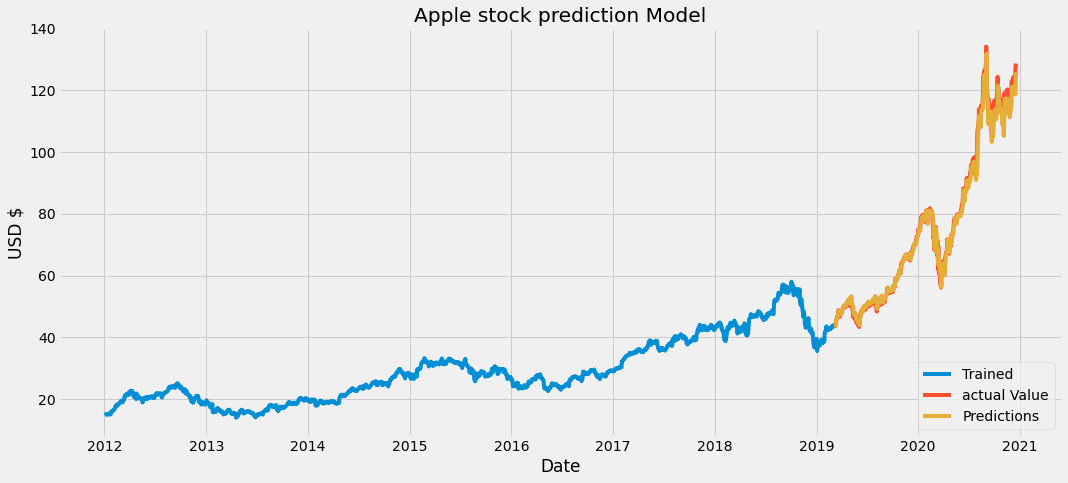

In [17]:
test_data = scaled_data[training_data_len - 60: , :]

x_test =[]

y_test= dataset[training_data_len:, :]

for i in range (60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
    
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt (np.mean(predictions - y_test) **2)

train = data[:training_data_len]

valid = data[training_data_len:]
valid['Predictions'] = predictions

#plotting predictrion of apple stock

plt.figure(figsize=(16, 7))

plt.title('Apple stock prediction Model')

plt.xlabel('Date', fontsize=17)

plt.ylabel('USD $', fontsize=17)

plt.plot(train ['Close'])

plt.plot(valid[['Close', 'Predictions']])

plt.legend (['Trained', 'actual Value', 'Predictions'], loc='lower right') 
plt.show()

In [20]:
print(valid)

                 Close  Predictions
Date                               
2019-03-08   43.227501    43.809902
2019-03-11   44.724998    43.649475
2019-03-12   45.227501    44.526485
2019-03-13   45.427502    45.401253
2019-03-14   45.932499    45.897457
...                ...          ...
2020-12-11  122.410004   119.634705
2020-12-14  121.779999   119.368637
2020-12-15  127.879997   118.723778
2020-12-16  127.809998   124.227356
2020-12-17  128.699997   125.823288

[451 rows x 2 columns]


In [43]:
#evaluation
import math
from sklearn.metrics import mean_squared_error

rmse_score = math.sqrt(mean_squared_error(y_test,predictions))
print(f"Root Mean Squared Error(test) :{rmse_score}")

from sklearn.metrics import r2_score
print(f"prediction accuracy :{r2_score(y_test,predictions)}")


Root Mean Squared Error(test) :2.4012948618243395
prediction accuracy :0.9911508789498201


In [30]:
#testing our model for given date for prediction of stock closing price

user=input("Enter date:")
aaple_stock = dataread.DataReader('AAPL', data_source='yahoo', start='2012-01-03', end=user)

new_df = aaple_stock.filter (['Close'])

prev_60_days = new_df[-60:].values

prev_60_days_scaled = scaler.transform(prev_60_days) 

x_test= []

x_test.append(prev_60_days_scaled)

x_test = np.array(x_test)

x_test = np.reshape (x_test, (x_test.shape [0], x_test.shape[1], 1))

pred_price = model.predict(x_test)

pred_price = scaler.inverse_transform(pred_price)

print ('predicted prcice of stock is :US $',pred_price[0][0])

Enter date:2020-07-1
predicted prcice of stock is :US $ 90.621574


In [33]:
#checking todays stock price
apple_stock2= dataread.DataReader('AAPL', data_source='yahoo', start='2020-07-01', end='2020-07-01')
print(apple_stock2['Close'])


Date
2020-07-01    91.027496
Name: Close, dtype: float64


array([[126.22125]], dtype=float32)